In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.11'

In [2]:
# Read in from supplement
df_combined = pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                            sheet_name='Different_Peak_Fits')


filtered_df = df_combined[df_combined['Diad1_cent_err'] < 1]

# Recreate original dataframes with correct variable names
V_Tm = filtered_df.query("sample == 'Fogo' and fit_type == 'Voigt'").reset_index(drop=True)
PV_Tm = filtered_df.query("sample == 'Fogo' and fit_type == 'PseudoVoigt'").reset_index(drop=True)
P4_Tm = filtered_df.query("sample == 'Fogo' and fit_type == 'Pearson4'").reset_index(drop=True)

V_kil = filtered_df.query("sample == 'Kilauea' and fit_type == 'Voigt'").reset_index(drop=True)
PV_kil = filtered_df.query("sample == 'Kilauea' and fit_type == 'PseudoVoigt'").reset_index(drop=True)
P4_kil = filtered_df.query("sample == 'Kilauea' and fit_type == 'Pearson4'").reset_index(drop=True)



In [3]:
PV_kil['Diad1_Combofit_Cent']

0     1285.529795
1     1285.483536
2     1285.494507
3     1285.991615
4     1285.956455
5     1286.164361
6     1285.613567
7     1285.568884
8     1285.608686
9     1285.637986
10    1285.637296
11    1285.904256
12    1285.819572
13    1285.894382
14    1285.691823
Name: Diad1_Combofit_Cent, dtype: float64

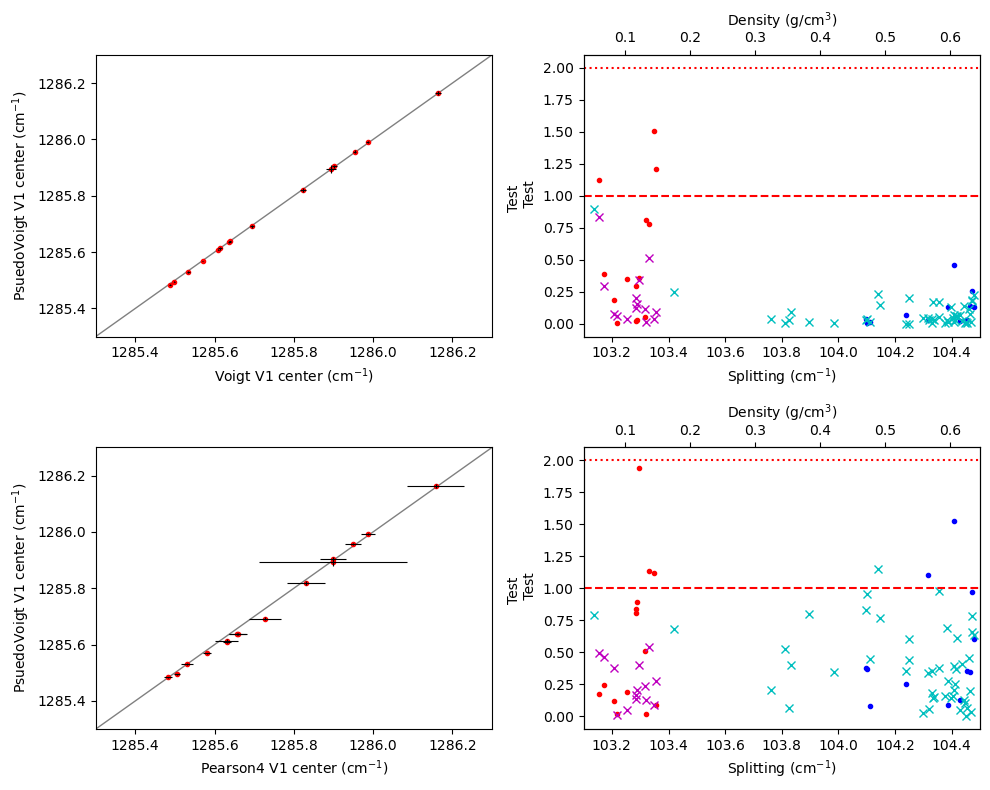

In [4]:
fig, ((ax4, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10,8))


# lets show an example for voigt vs psuedovoigt
# Lets show one example for psuedovoigt
ax4.plot([1285.3, 1286.3], [1285.3, 1286.3], '-', color='grey', lw=1)
ax4.set_xlim(1285.3, 1286.3)
ax4.set_ylim(1285.3, 1286.3)
ax4.plot(V_kil['Diad1_Combofit_Cent'], PV_kil['Diad1_Combofit_Cent'], '.r')
ax4.errorbar(V_kil['Diad1_Combofit_Cent'], PV_kil['Diad1_Combofit_Cent'],
 xerr=V_kil['Diad1_cent_err'], yerr=PV_kil['Diad1_cent_err'],
             fmt='.', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=0)

ax4.set_xlabel('Voigt V1 center (cm$^{-1}$)')
ax4.set_ylabel('PsuedoVoigt V1 center (cm$^{-1}$)')
# Lets combare the absolute magnitude
ax1.plot(PV_kil['Splitting'],
    np.abs(PV_kil['Diad1_Combofit_Cent']-V_kil['Diad1_Combofit_Cent'])/(PV_kil['Split_σ']**2+V_kil['Split_σ']**2)**0.5, 
         '.r', label='Kil v1')
ax1.plot(PV_kil['Splitting'],
         np.abs(PV_kil['Diad2_Combofit_Cent']-V_kil['Diad2_Combofit_Cent'])/(PV_kil['Split_σ']**2+V_kil['Split_σ']**2)**0.5, 
         'xm', label='Kil v2')
ax1.plot(PV_Tm['Splitting'],
         np.abs(PV_Tm['Diad1_Combofit_Cent']-V_Tm['Diad1_Combofit_Cent'])/(PV_Tm['Split_σ']**2+V_kil['Split_σ']**2)**0.5,
          '.b', label='Fogo v1')
ax1.plot(PV_Tm['Splitting'],
         np.abs(PV_Tm['Diad2_Combofit_Cent']-V_Tm['Diad2_Combofit_Cent'])/ (PV_Tm['Split_σ']**2+V_Tm['Split_σ']**2)**0.5,
          'xc', label='Fogo v2')
#ax1.legend()
ax1.plot([103.1, 104.5], [1, 1],'--r')
ax1.plot([103.1, 104.5], [2, 2],':r')
ax1.set_xlabel('Splitting (cm$^{-1}$)')
ax1.set_ylabel('Test \n Test')
# ax1.plot([0, 0.02], [0, 0.02], '-r')
#ax1.annotate("Fit Error < Difference", xy=(0.3, 0.8), xycoords="axes fraction", fontsize=10)
#ax1.annotate("Fit Error > Difference", xy=(0.3, 0.5), xycoords="axes fraction", fontsize=10)
        
# Show difference for 
ax3.plot(PV_kil['Splitting'],
    np.abs(PV_kil['Diad1_Combofit_Cent']-P4_kil['Diad1_Combofit_Cent'])/(PV_kil['Split_σ']**2+P4_kil['Split_σ']**2)**0.5, 
         '.r', label='Kil v1')
ax3.plot(PV_kil['Splitting'],
         np.abs(PV_kil['Diad2_Combofit_Cent']-P4_kil['Diad2_Combofit_Cent'])/(PV_kil['Split_σ']**2+P4_kil['Split_σ']**2)**0.5, 
         'xm', label='Kil v2')
ax3.plot(PV_Tm['Splitting'],
         np.abs(PV_Tm['Diad1_Combofit_Cent']-P4_Tm['Diad1_Combofit_Cent'])/(PV_Tm['Split_σ']**2+P4_kil['Split_σ']**2)**0.5,
          '.b', label='Fogo v1')
ax3.plot(PV_Tm['Splitting'],
         np.abs(PV_Tm['Diad2_Combofit_Cent']-P4_Tm['Diad2_Combofit_Cent'])/ (PV_Tm['Split_σ']**2+P4_Tm['Split_σ']**2)**0.5,
          'xc', label='Fogo v2')
#ax3.legend()
ax3.plot([103.1, 104.5], [1, 1],'--r')
ax3.plot([103.1, 104.5], [2, 2],':r')
ax3.set_xlabel('Splitting (cm$^{-1}$)')
ax3.set_ylabel('Test \n Test')

# Lets show one example for psuedovoigt
ax2.plot([1285.3, 1286.3], [1285.3, 1286.3], '-', color='grey', lw=1)
ax2.plot(P4_kil['Diad1_Combofit_Cent'], PV_kil['Diad1_Combofit_Cent'], '.r')
ax2.errorbar(P4_kil['Diad1_Combofit_Cent'], PV_kil['Diad1_Combofit_Cent'],
 xerr=P4_kil['Diad1_cent_err'], yerr=PV_kil['Diad1_cent_err'],
             fmt='.', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=0)



ax2.set_xlim(1285.3, 1286.3)
ax2.set_ylim(1285.3, 1286.3)

ax2.set_xlabel('Pearson4 V1 center (cm$^{-1}$)')
ax2.set_ylabel('PsuedoVoigt V1 center (cm$^{-1}$)')
# Lets duplicate the x axis to show density

low_split=103.1
high_split=104.5
Dens=pf.calculate_density_ucb(
corrected_split=pd.Series([low_split, high_split])*0.9975, split_err=0)['Density g/cm3']
ax1b=ax1.twiny()
ax1.set_xlim([low_split, high_split])
ax1b.set_xlim([Dens[0], Dens[1]])
ax1b.set_xlabel('Density (g/cm$^{3}$)')

ax3b=ax3.twiny()
ax3.set_xlim([low_split, high_split])
ax3b.set_xlim([Dens[0], Dens[1]])
ax3b.set_xlabel('Density (g/cm$^{3}$)')
## Lets plot the bakker data in density space


fig.tight_layout()
fig.savefig('Comparison_peakfits.png', dpi=200)